# Assignment 1 (Ames Housing)
## Problem Statement
The problem statement is to apply the tools of Machine Learning to develop a model that learns from a set of training data of sale prices for residential homes in Ames, Iowa. The trained model must correctly and predict the prices of the homes using the explanatory variables describing each aspect of the houses, based on the given test dataset which does not contain the sale prices.

## Import necessary libraries
The pandas, numpy and matplotlib libraries are needed for data visualisation and analysis, while scikit-learn gives us common classification algorithms that is used to develop the machine learning model.

In [1]:
# Data visualisation and analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.stats import pearsonr
sns.set_style("whitegrid")
#show plots in Jupyter Notebook browser
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Load datasets

In [2]:
# Import both train and test datasets
train_dataset = pd.read_csv('./datasets/train.csv')
test_dataset = pd.read_csv('./datasets/test.csv')

## Exploratory Data Analysis

In [3]:
# List train dataset's variables
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

There are a total of 81 columns, each column name represent an attribute of each house. The target variable is SalePrice, we observe that there are also missing data for some columns which needs to cleaned. The train dataset contains 38 numerical variables and 43 string/categorical variables.

In [4]:
# Save the Id column
train_ID = train_dataset['Id']
test_ID = test_dataset['Id']

print("Train dataset size before dropping of Id variable: {} ".format(train_dataset.shape))
print("Test dataset size before dropping of Id variable: {} ".format(test_dataset.shape))

# Drop the Id column as it is redundant for modeling
train_dataset.drop("Id", axis = 1, inplace = True)
test_dataset.drop("Id", axis = 1, inplace = True)

print("Train dataset size after dropping of Id variable: {} ".format(train_dataset.shape))
print("Test dataset size after dropping of Id variable: {} ".format(test_dataset.shape))

Train dataset size before dropping of Id variable: (1460, 81) 
Test dataset size before dropping of Id variable: (1459, 80) 
Train dataset size after dropping of Id variable: (1460, 80) 
Test dataset size after dropping of Id variable: (1459, 79) 


In [5]:
# Display first five entries in train dataset
train_dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### SalePrice correlation matrix

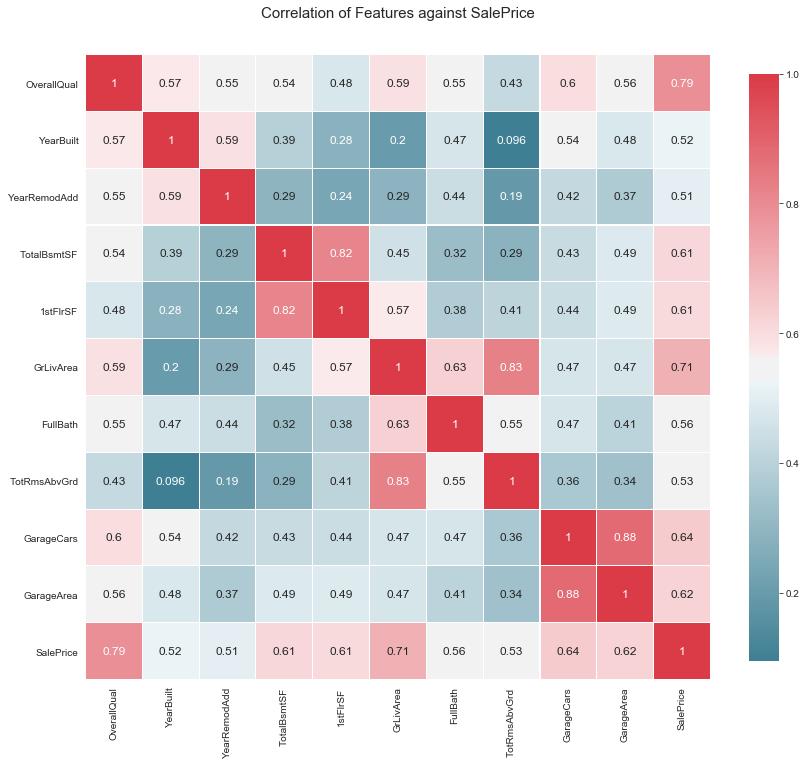

In [6]:
# Display features that have a correlation of 0.5 with SalePrice

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    corrmat = train_dataset.corr()
    top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
    _ = sns.heatmap(
        train_dataset[top_corr_features].corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Correlation of Features against SalePrice', y=1.05, size=15)

correlation_heatmap(train_dataset)

The output above shows the variables that have a correlation of more than or equals to 0.5 or -0.5 with SalePrice. A short description of each variable can be found on Kaggle. We will perform EDA on the top ten correalated variables shown below.

1. OverallQual: Rates the overall material and finish of the house (1 = Very Poor, 10 = Very Excellent)
2. GrLivArea: Above grade (ground) living area square feet
3. GarageCars: Size of garage in car capacity
4. GarageArea: Size of garage in square feet
5. TotalBsmtSF: Total square feet of basement area
6. 1stFlrSF: First Floor square feet
7. FullBath: Full bathrooms above grade
8. TotRmsAbvGrd:  Total rooms above grade (does not include bathrooms)
9. YearBuilt: Original construction date
10. YearRemodAdd: Remodel date 

### SalePrice

Skewness: 1.882876
Kurtosis: 6.536282


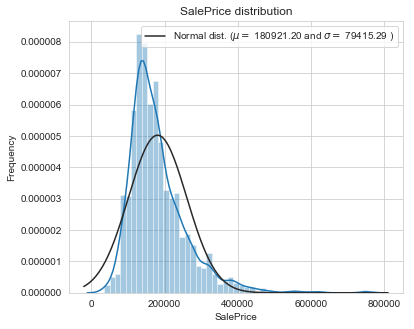

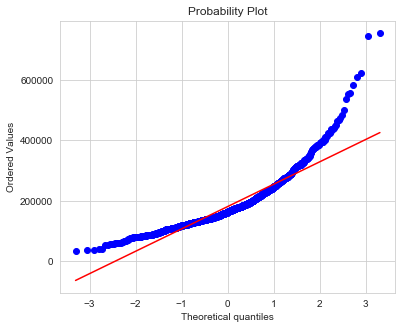

In [7]:
from scipy import stats
from scipy.stats import norm, skew
(mu, sigma) = norm.fit(train_dataset['SalePrice'])

#skewness and kurtosis
print("Skewness: %f" % train_dataset['SalePrice'].skew())
print("Kurtosis: %f" % train_dataset['SalePrice'].kurt())
#histogram
f, ax = plt.subplots(figsize=(6, 5))
sns.distplot(train_dataset['SalePrice'] , fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

#Get also the QQ-plot
fig = plt.figure(figsize=(6, 5))
res = stats.probplot(train_dataset['SalePrice'], plot=plt)
plt.show()

From the output above, we observe that the distribution of SalesPrice is positively skewed, with a high skewness of 1.88. Skewness refers to lack of symmetry in data distribution, differentiating extreme values from both tails. We also measure Kurtosis as a method to measure of outliers present in the distribution. The result indicates that the data is heavy-tailed or profusion of outliers (Kurtosis > 3). We can transform this feature to make it more evenly distributed by using log transformation during data wrangling.

### OverallQual

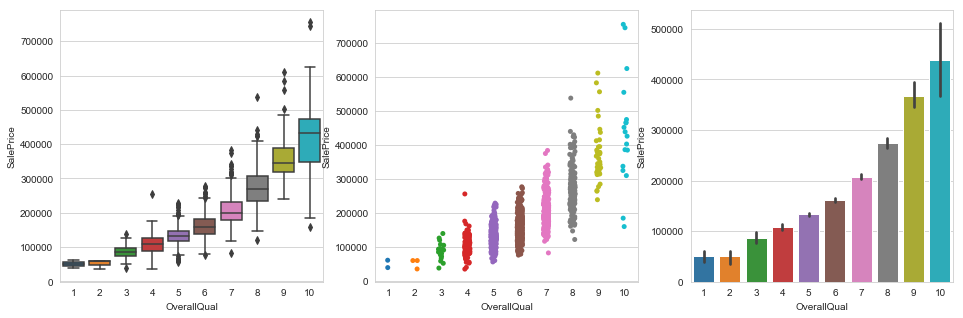

In [8]:
f,ax = plt.subplots(1,3,figsize=(16,5))

sns.boxplot(x="OverallQual", y="SalePrice", data=train_dataset,ax=ax[0])

sns.stripplot(x="OverallQual", y="SalePrice", data=train_dataset, size = 5, jitter = True,ax=ax[1])

sns.barplot(x="OverallQual", y="SalePrice", data=train_dataset,ax=ax[2])

OverallQual has the highest correlation with SalePrice, and the output is as expected as the price of a house increases when the overall material and finish of the house is better (Positive Correlation).

### GrLivArea

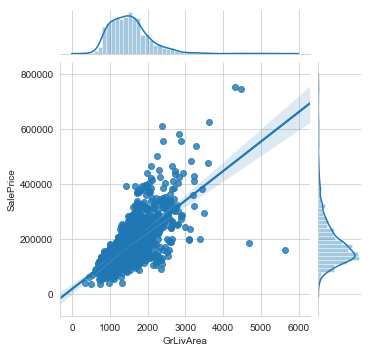

In [9]:
# Plot scatterplot with a regression line for GrLivArea against SalesPrice
sns.jointplot(x=train_dataset.GrLivArea, y=train_dataset.SalePrice, kind='reg',height=5)

There is a strong corrleation between SalePrice and GrLivArea because a larger living area would correspond to a higher sale price. However, it is observed that there are two major outliers at the bottom right of the scatterplot, as the outliers have extremely large living areas but have extremley low sale prices. We can remove the two outliers identified.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1458 non-null int64
MSZoning         1458 non-null object
LotFrontage      1199 non-null float64
LotArea          1458 non-null int64
Street           1458 non-null object
Alley            91 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
Utilities        1458 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Neighborhood     1458 non-null object
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null object
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-

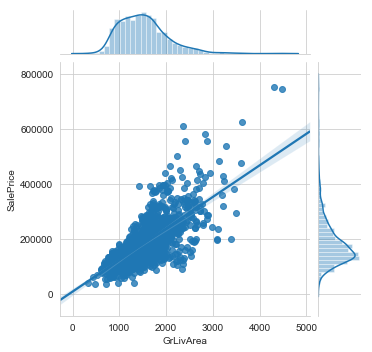

In [10]:
train_dataset = train_dataset.drop(train_dataset[(train_dataset['GrLivArea']>4000)&(train_dataset['SalePrice']<300000)].index)
sns.jointplot(x=train_dataset.GrLivArea, y=train_dataset.SalePrice, kind='reg',height=5)

# After removing the two points, there should be 1460-2=1458 entries
train_dataset.info()

### GarageCars

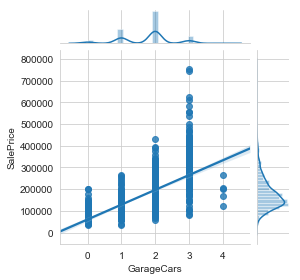

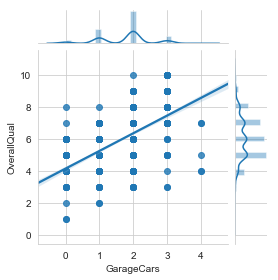

In [11]:
sns.jointplot(x=train_dataset.GarageCars, y=train_dataset.SalePrice, kind='reg',height=4)
sns.jointplot(x=train_dataset.GarageCars, y=train_dataset.OverallQual, kind='reg',height=4)

We can observe that the sale price of a house increases when the size of garage in car capacity increases, which is expected from our assumptions. However, when the size of the garage is 4 cars, the sale price dips. This may be due to the lower OverallQual for houses that can fit 4 cars in the garage, hence we can ignore the anomalies.

### GarageArea

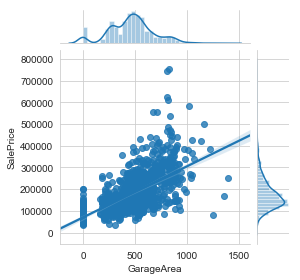

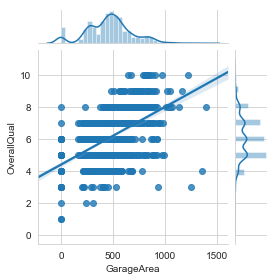

In [12]:
sns.jointplot(x=train_dataset.GarageArea, y=train_dataset.SalePrice, kind='reg',height=4)
sns.jointplot(x=train_dataset.GarageArea, y=train_dataset.OverallQual, kind='reg',height=4)

Similarly with GarageCars, We can observe that the sale price of a house increases when the size of garage in square feet increases, which is expected from our assumptions. However, we observe three anomalies at the bottom right of the scatterplot. This may be due to the lower OverallQual for those houses hence we can ignore the anomalies.

### TotalBsmtSF & 1stFlrSF

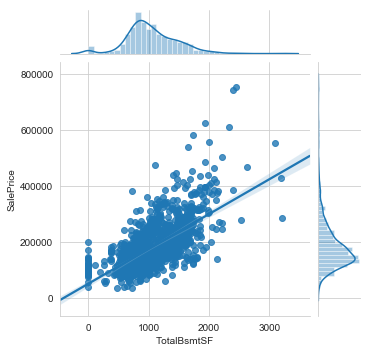

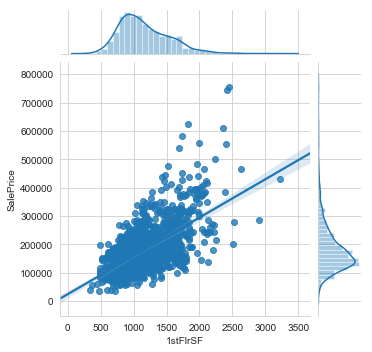

In [13]:
sns.jointplot(x=train_dataset.TotalBsmtSF, y=train_dataset.SalePrice, kind='reg',height=5)
sns.jointplot(x=train_dataset['1stFlrSF'], y=train_dataset.SalePrice, kind='reg',height=5)

We observe that the sale price increases as the size of the basement and first floor increases in terms of square feet.

### FullBath

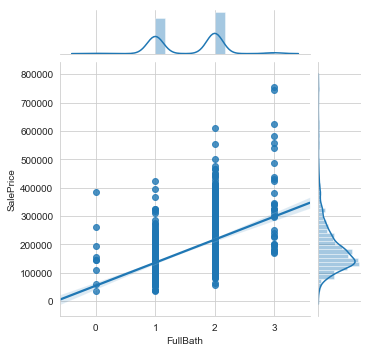

In [14]:
sns.jointplot(x=train_dataset.FullBath, y=train_dataset.SalePrice, kind='reg',height=5)

We observe that the houses with more number of full bathrooms above ground would have a higher sale price.

### TotRmsAbvGrd

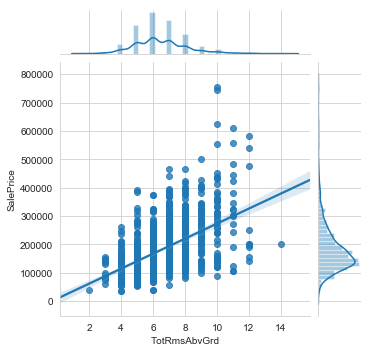

In [15]:
sns.jointplot(x=train_dataset.TotRmsAbvGrd, y=train_dataset.SalePrice, kind='reg',height=5)

Generally we see a positive correlation, as the number of rooms increases, so does the SalePrice.

### YearBuilt

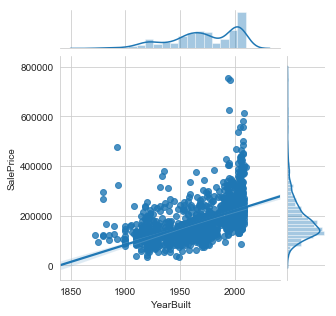

In [16]:
sns.jointplot(x=train_dataset.YearBuilt, y=train_dataset.SalePrice, kind='reg',height=4.5)

From the output, we observe that newer houses tend to have a higher sale price.

### YearRemodAdd

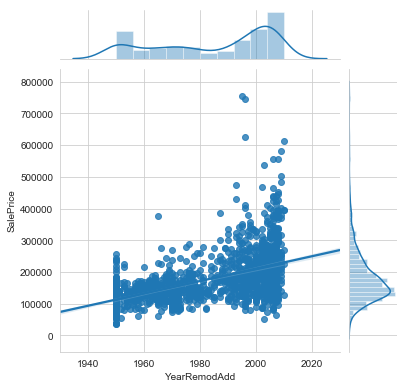

In [17]:
sns.jointplot(x=train_dataset.YearRemodAdd, y=train_dataset.SalePrice, kind='reg',height=5.5)

We observe that there is a general positive correaltion between YearRemodAdd and SalePrice, the newer the remodelling of a house, the higher the SalePrice.

## Feature Engineering

### Missing Values

In [18]:
# Save the train and test datasets before combinining
ntrain = train_dataset.shape[0]
ntest = test_dataset.shape[0]

y_train = train_dataset.SalePrice
# combine train and test data
all_dataset = pd.concat((train_dataset, test_dataset)).reset_index(drop=True)
all_dataset.drop(['SalePrice'], axis=1, inplace=True)
# train + test (148+1459 = 2917)
print("all_dataset shape: {}".format(all_dataset.shape))

#aggregate all null values 
all_dataset_null = all_dataset.isnull().sum()

# get rid of all the values with 0 missing values
all_dataset_null = all_dataset_null.drop(all_dataset_null[all_dataset_null == 0].index).sort_values(ascending=False)
# Display variables with missing values
all_dataset_null

all_dataset shape: (2917, 79)


PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageArea         1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
dtype: int64

The output above shows which variables that have empty values. I will be using the data description for each variable that is found on Kaggle to determine what to fill in for the null values. Categorical variables with string datatype and have null values will be filled with "None", the null values represent that the particular house does not contain that aspect. On the other hand, numerical variables will be filled with 0, as the null values are attributed because of the null values in the corresponding categorical variable. (e.g No Garage, GarageYrBuilt=0)

In [19]:
# Categorical variables with string values, fill null values with "None".
for col in ("PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
           "GarageType", "GarageFinish", "GarageQual", "GarageCond",
           "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
            "BsmtFinType2", "MSSubClass", "MasVnrType"):
    all_dataset[col] = all_dataset[col].fillna("None")
    
# Fill numerical variables with 0
for col in ("GarageYrBlt", "GarageArea", "GarageCars", "BsmtFinSF1", 
           "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea",
           "BsmtFullBath", "BsmtHalfBath"):
    all_dataset[col] = all_dataset[col].fillna(0)
    
# The area of each street connected to the house likely to be similar to the houses in the local neighbourhood
# we can fill in missing values by the median LotFrontage of the neighborhood.
all_dataset["LotFrontage"] = all_dataset.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# Fill the other categorical variables with mode as the number of null values are low
all_dataset['MSZoning'] = all_dataset['MSZoning'].fillna(all_dataset['MSZoning'].mode()[0])
all_dataset['Electrical'] = all_dataset['Electrical'].fillna(all_dataset['Electrical'].mode()[0])
all_dataset['KitchenQual'] = all_dataset['KitchenQual'].fillna(all_dataset['KitchenQual'].mode()[0])
all_dataset['Exterior1st'] = all_dataset['Exterior1st'].fillna(all_dataset['Exterior1st'].mode()[0])
all_dataset['Exterior2nd'] = all_dataset['Exterior2nd'].fillna(all_dataset['Exterior2nd'].mode()[0])
all_dataset['SaleType'] = all_dataset['SaleType'].fillna(all_dataset['SaleType'].mode()[0])
all_dataset["Functional"] = all_dataset["Functional"].fillna(all_dataset['Functional'].mode()[0])

all_dataset_null = all_dataset.isnull().sum()
print("Remaining variables with missing values:\n", all_dataset_null.drop(all_dataset_null[all_dataset_null == 0].index))

Remaining variables with missing values:
 Utilities    2
dtype: int64


We have one remaining variable, Utilities, that have missing values.

Text(0.5,1,'Utilities - Test')

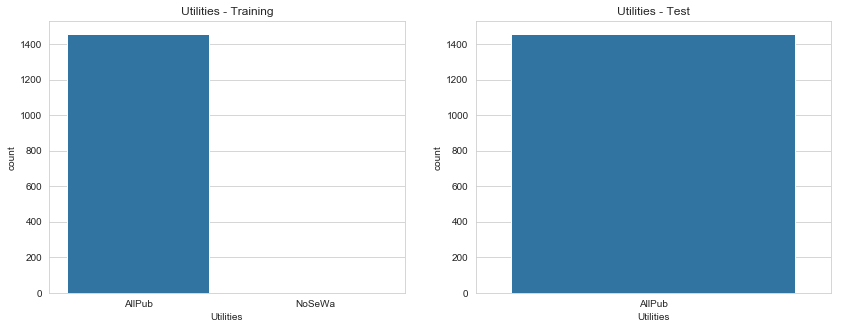

In [20]:
f,ax = plt.subplots(1,2,figsize=(14,5))
sns.countplot(x = "Utilities", data = train_dataset, ax=ax[0]).set_title("Utilities - Training")
sns.countplot(x = "Utilities", data = test_dataset, ax=ax[1]).set_title("Utilities - Test")

It is observed that the train dataset has two unqiue values, AllPub and NoSeWa. However, the test dataset only has AllPub, the variable has no predictive power as it is a constant. Hence, we can safely drop this column.

In [21]:
# Drop Utilities
all_dataset = all_dataset.drop(['Utilities'], axis=1)

# Check if there are any more missing values
all_dataset_null = all_dataset.isnull().sum()
print("Remaining variables with missing values: ", len(all_dataset_null.drop(all_dataset_null[all_dataset_null == 0].index)))

Remaining variables with missing values:  0


### Transforming variables datatypes
We identified several variables that have numerical datatype, but are actually categorical. Hence, we can transform these numerical variables into categorical variables.

In [22]:
#The building class
all_dataset['MSSubClass'] = all_dataset['MSSubClass'].astype(str)

#Year and month sold
all_dataset['YrSold'] = all_dataset['YrSold'].astype(str)
all_dataset['MoSold'] = all_dataset['MoSold'].astype(str)

### Encoding categorical variables

In [23]:
# Encode ordinal variables
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_dataset[c].values)) 
    all_dataset[c] = lbl.transform(list(all_dataset[c].values))

all_dataset = pd.get_dummies(all_dataset)

### Treating skewed variables
As mention earlier, it was observed that the target variable was postively skewed. We can perform log transformation to lower the skewness.

Skewness: 0.121580
Kurtosis: 0.804751


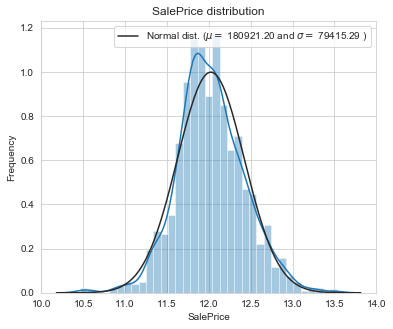

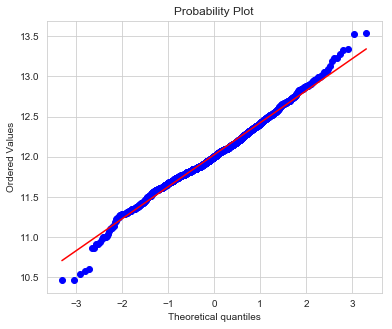

In [24]:
# Applying a log(1+x) transformation to SalePrice
train_dataset["SalePrice"] = np.log1p(train_dataset["SalePrice"])
y_train = train_dataset["SalePrice"]
f, ax = plt.subplots(figsize=(6, 5))
# Plot Sale Price
sns.distplot(train_dataset['SalePrice'] , fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

#skewness and kurtosis
print("Skewness: %f" % train_dataset['SalePrice'].skew())
print("Kurtosis: %f" % train_dataset['SalePrice'].kurt())
#Get also the QQ-plot
fig = plt.figure(figsize=(6, 5))
res = stats.probplot(train_dataset['SalePrice'], plot=plt)
plt.show()

After applying log transformation, the SalePrice feature appears to be more distributed and less skewed. We can do the same for the other skewed variables using Box-Cox transformation. Box-Cox transformation transforms non-normal variables into a normal shape. Normality is an important assumption for many statistical techniques.

In [25]:
# Get all numeric features
numeric_feats = all_dataset.dtypes[all_dataset.dtypes != "object"].index

# Check how skewed they are
skewed_feats = all_dataset[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Get variables that have a skewness of more than -0.5 and 0.5
skewness = skewed_feats[abs(skewed_feats) > 0.5]
from scipy.special import boxcox1p

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_dataset[feat] = boxcox1p(all_dataset[feat], lam)

print(skewness.shape[0],  "skewed numerical features have been Box-Cox transformed")

202 skewed numerical features have been Box-Cox transformed


## Model Training

In [26]:
# Now to return to separate train and test datasets
train_dataset = all_dataset[:ntrain]
test_dataset = all_dataset[ntrain:]

### Feature importance
We can use xgboost built-in feature importance function to calculate the importance of each feature and compare it against the other features. This allows us to perform feature selection and reduce the number of features.

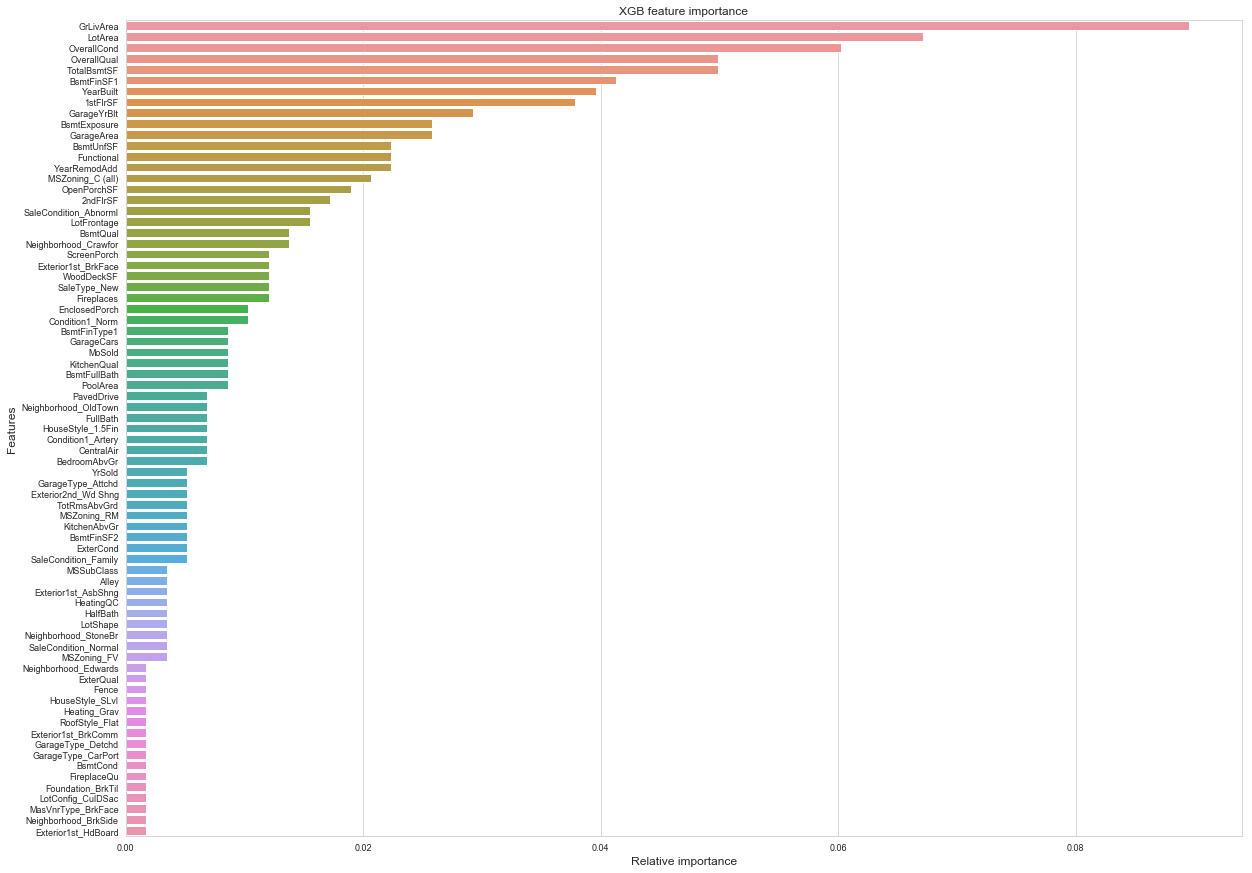

In [27]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(train_dataset, y_train)

# Sort feature importances from GBC model trained earlier
indices = np.argsort(model.feature_importances_)[::-1]
indices = indices[:75]

# Visualise these with a barplot
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=train_dataset.columns[indices], x = model.feature_importances_[indices], orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("XGB feature importance");

We can perform feature selection for our pre-trained model using SelectFromModel function from sklearn, based on the importance of the features. Afterwards, we can select the same features on the train and test dataset by using the transform() function.

In [28]:
from sklearn.feature_selection import SelectFromModel
xgb_train = train_dataset.copy()
xgb_test = test_dataset.copy()

model = xgb.XGBRegressor()
model.fit(xgb_train, y_train)

# Allow the feature importances attribute to select the most important features
feature_selection = SelectFromModel(model, prefit = True)

# Reduce estimation, validation and test datasets
xgb_train = feature_selection.transform(xgb_train)
xgb_test = feature_selection.transform(xgb_test)


print("Results of 'feature_importances_':")
print('X_train: ', xgb_train.shape, '\nX_test: ', xgb_test.shape)

Results of 'feature_importances_':
X_train:  (1458, 50) 
X_test:  (1459, 50)


### Base model training
We will use RMSE and scikit's cross_val_score to determine and compare the models' accuracy and cross-validation scores. We also use ShuffleSplit to shuffle the dataset before cross-validation.

In [29]:
# Split train dataset
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(xgb_train, y_train, test_size=0.3, random_state=42)

print('X_train: ', X_train.shape, '\nX_test: ', X_test.shape, '\nY_train: ', Y_train.shape, '\nY_test: ', Y_test.shape)

X_train:  (1020, 50) 
X_test:  (438, 50) 
Y_train:  (1020,) 
Y_test:  (438,)


In [30]:
# import all algorithms
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score, train_test_split
from numpy.core.umath_tests import inner1d

models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]

shuff = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

#create table to compare models' accuracy
columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy']
base_model_compare = pd.DataFrame(columns = columns)

# iterate through modelslist
row_index = 0
for alg in models:

    #set name and parameters
    model_name = alg.__class__.__name__
    base_model_compare.loc[row_index, 'Name'] = model_name
    base_model_compare.loc[row_index, 'Parameters'] = str(alg.get_params())
    
    alg.fit(X_train, Y_train)
    
    #score model with cross validation, using RMSE
    training_results = np.sqrt((-cross_val_score(alg, X_train, Y_train, cv = shuff, scoring= 'neg_mean_squared_error')).mean())
    test_results = np.sqrt(((Y_test-alg.predict(X_test))**2).mean())
    
    base_model_compare.loc[row_index, 'Train Accuracy Mean'] = training_results.mean()
    base_model_compare.loc[row_index, 'Test Accuracy'] = test_results.mean()
    
    row_index+=1
    
base_model_compare['Train Accuracy Mean'] = base_model_compare['Train Accuracy Mean']
base_model_compare['Test Accuracy'] = base_model_compare['Test Accuracy']
base_model_compare

C:\Poly\AI\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,Name,Parameters,Train Accuracy Mean,Test Accuracy
0,KernelRidge,"{'alpha': 1, 'coef0': 1, 'degree': 3, 'gamma':...",0.112108,0.116096
1,ElasticNet,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.268327,0.271559
2,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.272541,0.274459
3,GradientBoostingRegressor,"{'alpha': 0.9, 'criterion': 'friedman_mse', 'i...",0.130432,0.119261
4,BayesianRidge,"{'alpha_1': 1e-06, 'alpha_2': 1e-06, 'compute_...",0.11325,0.118299
5,LassoLarsIC,"{'copy_X': True, 'criterion': 'aic', 'eps': 2....",0.117985,0.115544
6,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",0.147317,0.145365
7,XGBRegressor,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.127575,0.123452


In [31]:
from sklearn.model_selection import GridSearchCV
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]

KR_param_grid = {'alpha': [0.1], 'coef0': [100], 'degree': [1], 'gamma': [None], 'kernel': ['polynomial']}
EN_param_grid = {'alpha': [0.001], 'copy_X': [True], 'l1_ratio': [0.6], 'fit_intercept': [True], 'normalize': [False], 
                         'precompute': [False], 'max_iter': [300], 'tol': [0.001], 'selection': ['random'], 'random_state': [None]}
LASS_param_grid = {'alpha': [0.0005], 'copy_X': [True], 'fit_intercept': [True], 'normalize': [False], 'precompute': [False], 
                    'max_iter': [300], 'tol': [0.01], 'selection': ['random'], 'random_state': [None]}
GB_param_grid = {'loss': ['huber'], 'learning_rate': [0.1], 'n_estimators': [300], 'max_depth': [3], 
                                        'min_samples_split': [0.0025], 'min_samples_leaf': [5]}
BR_param_grid = {'n_iter': [200], 'tol': [0.00001], 'alpha_1': [0.00000001], 'alpha_2': [0.000005], 'lambda_1': [0.000005], 
                 'lambda_2': [0.00000001], 'copy_X': [True]}
LL_param_grid = {'criterion': ['aic'], 'normalize': [True], 'max_iter': [100], 'copy_X': [True], 'precompute': ['auto'], 'eps': [0.000001]}
RFR_param_grid = {'n_estimators': [50], 'max_features': ['auto'], 'max_depth': [None], 'min_samples_split': [5], 'min_samples_leaf': [2]}
XGB_param_grid = {'max_depth': [3], 'learning_rate': [0.1], 'n_estimators': [300], 'booster': ['gbtree'], 'gamma': [0], 'reg_alpha': [0.1],
                  'reg_lambda': [0.7], 'max_delta_step': [0], 'min_child_weight': [1], 'colsample_bytree': [0.5], 'colsample_bylevel': [0.2],
                  'scale_pos_weight': [1]}
params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, LL_param_grid, RFR_param_grid, XGB_param_grid]

tuned_model_compare = pd.DataFrame(columns = columns)

row_index = 0
for alg in models:
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(0)

    #set name and parameters
    model_name = alg.__class__.__name__
    tuned_model_compare.loc[row_index, 'Name'] = model_name
    
    gs_alg.fit(X_train, Y_train)
    gs_best = gs_alg.best_estimator_
    tuned_model_compare.loc[row_index, 'Parameters'] = str(gs_alg.best_params_)
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    tuned_training_results = np.sqrt(-gs_alg.best_score_)
    tuned_test_results = np.sqrt(((Y_test-gs_alg.predict(X_test))**2).mean())
    
    tuned_model_compare.loc[row_index, 'Train Accuracy Mean'] = tuned_training_results.mean()
    tuned_model_compare.loc[row_index, 'Test Accuracy'] = tuned_test_results.mean()
    
    row_index+=1
    


tuned_model_compare['Train Accuracy Mean'] = tuned_model_compare['Train Accuracy Mean']
tuned_model_compare['Test Accuracy'] = tuned_model_compare['Test Accuracy']
tuned_model_compare

,Name,Parameters,Train Accuracy Mean,Test Accuracy
0,KernelRidge,"{'alpha': 0.1, 'coef0': 100, 'degree': 1, 'gam...",0.113679,0.119387
1,ElasticNet,"{'alpha': 0.001, 'copy_X': True, 'fit_intercep...",0.114471,0.119079
2,Lasso,"{'alpha': 0.0005, 'copy_X': True, 'fit_interce...",0.113972,0.118239
3,GradientBoostingRegressor,"{'learning_rate': 0.1, 'loss': 'huber', 'max_d...",0.125372,0.120154
4,BayesianRidge,"{'alpha_1': 1e-08, 'alpha_2': 5e-06, 'copy_X':...",0.113251,0.118302
5,LassoLarsIC,"{'copy_X': True, 'criterion': 'aic', 'eps': 1e...",0.117985,0.115544
6,RandomForestRegressor,"{'max_depth': None, 'max_features': 'auto', 'm...",0.144369,0.139962
7,XGBRegressor,"{'booster': 'gbtree', 'colsample_bylevel': 0.2...",0.119183,0.122309


In [32]:
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]
names = ['KernelRidge', 'ElasticNet', 'Lasso', 'Gradient Boosting', 'Bayesian Ridge', 'Lasso Lars IC', 'Random Forest', 'XGBoost']
params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, LL_param_grid, RFR_param_grid, XGB_param_grid]
stacked_validation_train = pd.DataFrame()
stacked_test_train = pd.DataFrame()

row_index=0

for alg in models:
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(0)
    
    gs_alg.fit(X_train, Y_train)
    gs_best = gs_alg.best_estimator_
    stacked_validation_train.insert(loc = row_index, column = names[0], value = gs_best.predict(X_test))
    print(row_index+1, alg.__class__.__name__, 'predictions added to stacking validation dataset...')
    
    stacked_test_train.insert(loc = row_index, column = names[0], value = gs_best.predict(xgb_test))
    print(row_index+1, alg.__class__.__name__, 'predictions added to stacking test dataset...')
    print("-"*50)
    names.pop(0)
    
    row_index+=1
    
print('Done')

1 KernelRidge predictions added to stacking validation dataset...
1 KernelRidge predictions added to stacking test dataset...
--------------------------------------------------
2 ElasticNet predictions added to stacking validation dataset...
2 ElasticNet predictions added to stacking test dataset...
--------------------------------------------------
3 Lasso predictions added to stacking validation dataset...
3 Lasso predictions added to stacking test dataset...
--------------------------------------------------
4 GradientBoostingRegressor predictions added to stacking validation dataset...
4 GradientBoostingRegressor predictions added to stacking test dataset...
--------------------------------------------------
5 BayesianRidge predictions added to stacking validation dataset...
5 BayesianRidge predictions added to stacking test dataset...
--------------------------------------------------
6 LassoLarsIC predictions added to stacking validation dataset...
6 LassoLarsIC predictions added

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
# First drop the Lasso results from the table, as we will be using Lasso as the meta-model
drop = ['Bayesian Ridge']
stacked_validation_train.drop(drop, axis=1, inplace=True)
stacked_test_train.drop(drop, axis=1, inplace=True)

# Now fit the meta model and generate predictions
meta_model = make_pipeline(BayesianRidge(alpha_1=1e-08, alpha_2= 5e-06, copy_X=True, lambda_1= 5e-06, lambda_2= 1e-08, n_iter = 200, tol=1e-05))
meta_model.fit(stacked_validation_train, Y_test)
training_results = np.sqrt((-cross_val_score(meta_model, stacked_validation_train, Y_test, cv = shuff, scoring= 'neg_mean_squared_error')).mean())
print("Training accuracy of stacking: {}".format(training_results.mean()))

meta_model_pred = np.expm1(meta_model.predict(stacked_test_train))
print("Meta-model trained and applied!...")

Training accuracy of stacking: 0.11984938172210059
Meta-model trained and applied!...


In [34]:
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]
names = ['KernelRidge', 'ElasticNet', 'Lasso', 'Gradient Boosting', 'Bayesian Ridge', 'Lasso Lars IC', 'Random Forest', 'XGBoost']
params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, LL_param_grid, RFR_param_grid, XGB_param_grid]
final_predictions = pd.DataFrame()

row_index=0

for alg in models:
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(0)
    
    gs_alg.fit(stacked_validation_train, Y_test)
    gs_best = gs_alg.best_estimator_
    final_predictions.insert(loc = row_index, column = names[0], value = np.expm1(gs_best.predict(stacked_test_train)))
    print(row_index+1, alg.__class__.__name__, 'final results predicted added to table...')
    names.pop(0)
    
    row_index+=1

print("-"*50)
print("Done")
    
final_predictions.head()

1 KernelRidge final results predicted added to table...
2 ElasticNet final results predicted added to table...
3 Lasso final results predicted added to table...
4 GradientBoostingRegressor final results predicted added to table...
5 BayesianRidge final results predicted added to table...
6 LassoLarsIC final results predicted added to table...
7 RandomForestRegressor final results predicted added to table...
8 XGBRegressor final results predicted added to table...
--------------------------------------------------
Done


,KernelRidge,ElasticNet,Lasso,Gradient Boosting,Bayesian Ridge,Lasso Lars IC,Random Forest,XGBoost
0,121950.421305,122351.291497,119845.165525,123331.327222,121775.210911,121391.514789,122537.855399,119248.976562
1,156974.078238,156767.213881,157002.654448,158947.084527,157198.886096,157069.926592,162372.569601,160067.250000
2,183255.380060,182951.605308,182080.485226,189072.408806,183862.412146,183557.227581,184150.284515,190169.234375
3,189060.208180,188200.354081,189187.062084,197655.095906,189598.716856,189535.694788,197486.165513,198657.343750
4,183168.442791,183871.459334,186028.861603,181489.343301,182393.535258,182376.812388,176320.058811,185464.796875


In [38]:
ensemble = meta_model_pred*(7/10) + final_predictions['Bayesian Ridge']*(2/10) + final_predictions['Lasso']*(1/10)

submission = pd.DataFrame()
submission['Id'] = test_ID
# gs_alg = GridSearchCV(Lasso(), param_grid = LASS_param_grid, cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    
# gs_alg.fit(X_train, Y_train)
# gs_best = gs_alg.best_estimator_
submission['SalePrice'] = ensemble
submission.to_csv('final_submission.csv',index=False)
print("Submission file, created!")

Submission file, created!
